In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('PURCHASE.CSV')

In [3]:
data

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,B,3,0.0,5.0,NaN,NaN,3604.0


# EDA [Exploratory Data Analysis]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   City_Category               263014 non-null  object 
 5   Stay_In_Current_City_Years  263014 non-null  object 
 6   Marital_Status              263014 non-null  float64
 7   Product_Category_1          263014 non-null  float64
 8   Product_Category_2          181501 non-null  float64
 9   Product_Category_3          80582 non-null   float64
 10  Purchase                    263014 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 22.1+ MB


In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,C,4+,0.0,8.0,NaN,NaN,7969.0


In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [9]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [10]:
data.isnull().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [13]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80582 entries, 1 to 263011
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  object 
 2   Gender                      80582 non-null  object 
 3   Age                         80582 non-null  object 
 4   City_Category               80582 non-null  object 
 5   Stay_In_Current_City_Years  80582 non-null  int32  
 6   Marital_Status              80582 non-null  float64
 7   Product_Category_1          80582 non-null  float64
 8   Product_Category_2          80582 non-null  float64
 9   Product_Category_3          80582 non-null  float64
 10  Purchase                    80582 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 7.1+ MB


In [15]:
data.describe()

,User_ID,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,8.058200e+04,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000
mean,1.002950e+06,1.860775,0.401752,2.738366,6.892085,12.658298,11628.183279
std,1.706623e+03,1.285501,0.490255,2.563225,4.498417,4.129156,5069.515441
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.001470e+06,1.000000,0.000000,1.000000,2.000000,9.000000,7868.000000
50%,1.002996e+06,2.000000,0.000000,1.000000,6.000000,14.000000,11744.500000
75%,1.004326e+06,3.000000,1.000000,4.000000,10.000000,16.000000,15610.000000
max,1.006040e+06,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


In [16]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

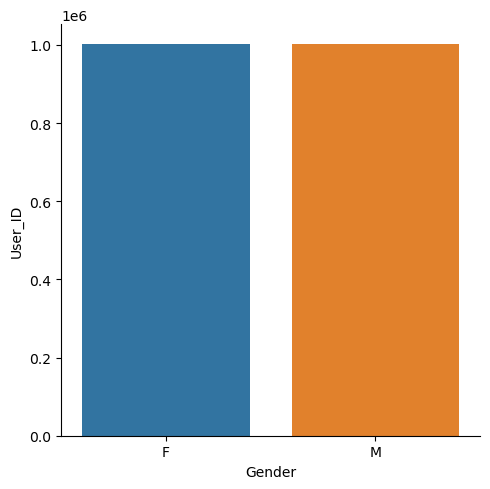

In [17]:
sns.catplot(data = data, x='Gender', y='User_ID', kind='bar')

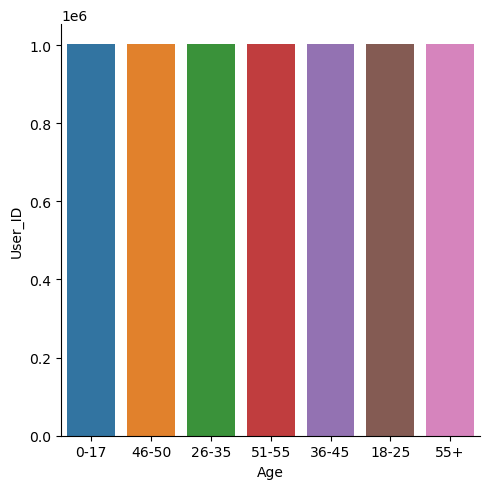

In [20]:
sns.catplot(data = data, x='Age', y='User_ID', kind='bar')
plt.show()

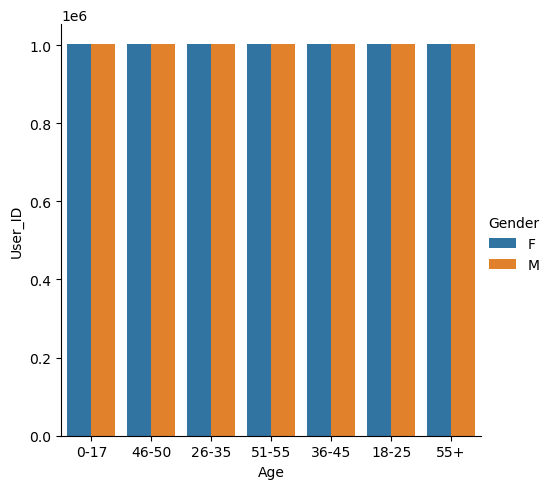

In [21]:
sns.catplot(data=data, x='Age', y='User_ID', kind='bar', hue='Gender')
plt.show()

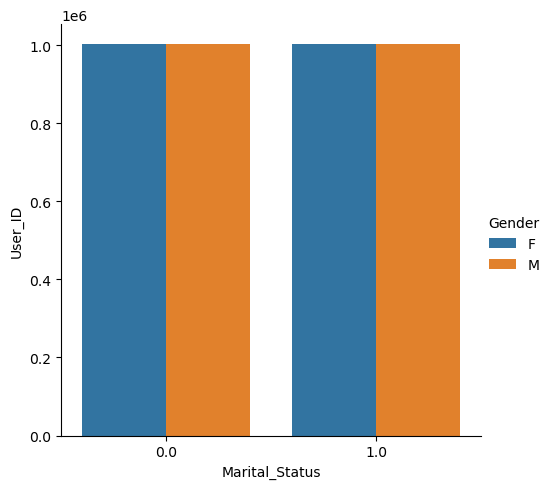

In [22]:
sns.catplot(data=data, x='Marital_Status', y='User_ID', kind='bar', hue='Gender')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


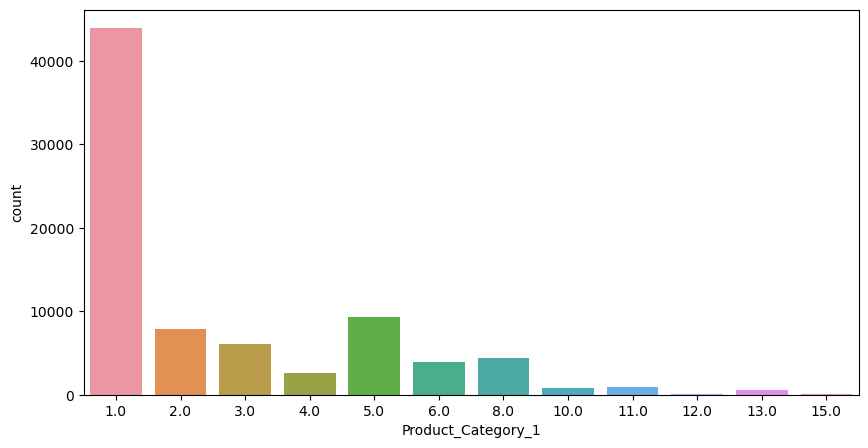

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_1'])
plt.show()

In [24]:
# Product_Category_1 sees a dominant balance among categories.
### The product_category_1 sees a great rise of product category 1 and lowest in 12th and 15th categories.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


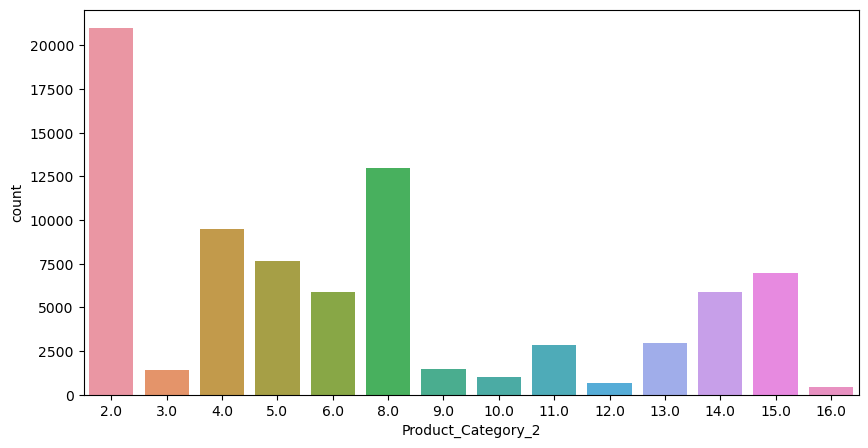

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_2'])
plt.show()

In [26]:
# Product_Category_2 sees a considerate balance among categories. 
#With category 2 topping the charts, and other considerable categories are 8,,4,5,6,14,15,etc.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


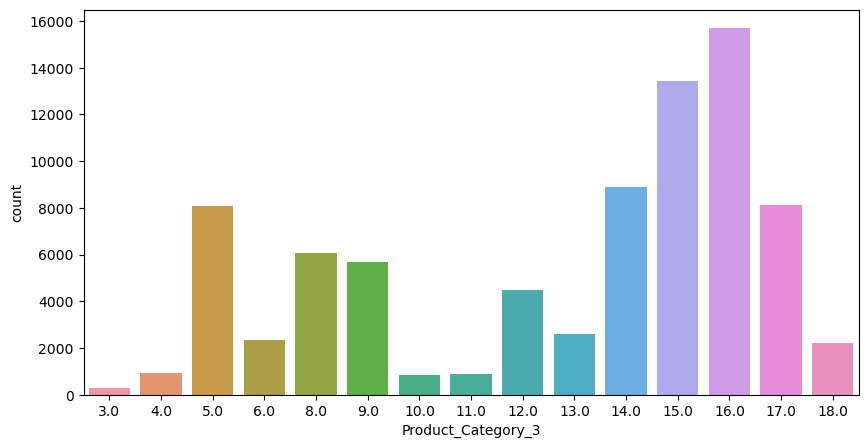

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [28]:
# Product_Category_3 sees a considerate balance among categories. 
#With category 16 topping the charts, and other considerable categories are 5,8,9,14,15,17 etc.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


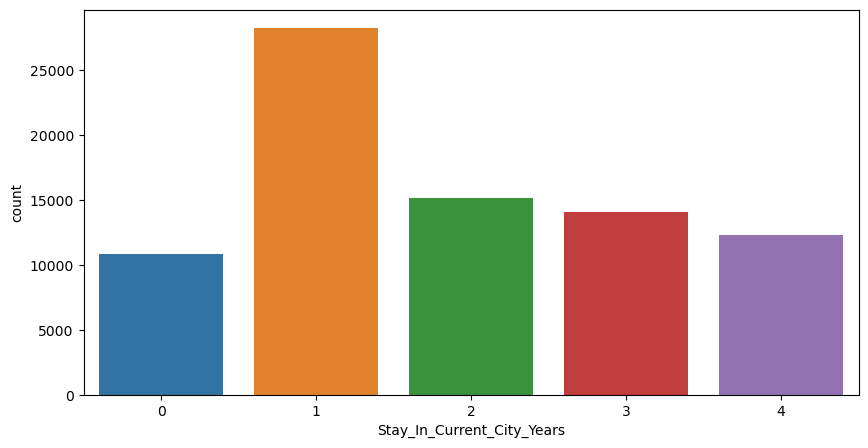

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

In [30]:
### Majority of the customers have stayed a year in the city.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


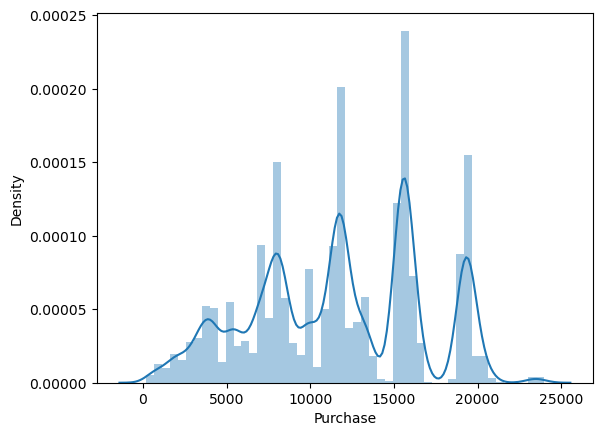

In [31]:
sns.distplot(data['Purchase'])
plt.show()

In [32]:
#Purchases are not accumulated in a range, rather varies in different intervals

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_list = ['User_ID', "Product_ID", "Gender",'Age', 'City_Category']

for col in col_list:
    data[col] = le.fit_transform(data[col])
    print(col, le.classes_)

User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000642' 'P00001042' 'P00001142' 'P00001542'
 'P00002142' 'P00002242' 'P00003442' 'P00004242' 'P00004842' 'P00005542'
 'P00005942' 'P00006942' 'P00008042' 'P00010542' 'P00010742' 'P00010942'
 'P00011942' 'P00012242' 'P00014442' 'P00014642' 'P00014842' 'P00015542'
 'P00015642' 'P00015842' 'P00015942' 'P00016342' 'P00016442' 'P00016542'
 'P00016742' 'P00016842' 'P00019042' 'P00019342' 'P00021842' 'P00023342'
 'P00024142' 'P00025242' 'P00025342' 'P00025442' 'P00026042' 'P00028442'
 'P00028542' 'P00029542' 'P00030842' 'P00030942' 'P00031842' 'P00032042'
 'P00034042' 'P00034142' 'P00034242' 'P00034442' 'P00034742' 'P00035042'
 'P00035342' 'P00035542' 'P00035842' 'P00035942' 'P00036842' 'P00037142'
 'P00038042' 'P00038142' 'P00041342' 'P00041442' 'P00042142' 'P00043842'
 'P00044242' 'P00045042' 'P00045142' 'P00045242' 'P00045342' 'P00046742'
 'P00048042' 'P00048342' 'P00050042' 'P00050342' 'P

In [34]:
data.head()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,391,0,0,0,2,0.0,1.0,6.0,14.0,15200.0
6,3,284,1,4,1,2,1.0,1.0,8.0,17.0,19215.0
13,4,211,1,2,0,1,1.0,1.0,2.0,5.0,15665.0
14,5,363,0,5,0,1,0.0,5.0,8.0,14.0,5378.0
16,5,517,0,5,0,1,0.0,2.0,3.0,4.0,13055.0


In [35]:
data.corr()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.008247,-0.031117,0.037451,0.019336,-0.027410,0.015240,0.007023,0.007372,0.002163,0.000603
Product_ID,-0.008247,1.000000,0.014412,0.021192,-0.025223,-0.003153,0.010618,0.019471,0.024563,0.019219,-0.108025
Gender,-0.031117,0.014412,1.000000,-0.008751,-0.002937,0.012817,-0.010459,-0.069258,-0.016422,0.033820,0.060034
Age,0.037451,0.021192,-0.008751,1.000000,0.098402,-0.010013,0.311430,0.052910,0.047808,0.054444,0.023078
City_Category,0.019336,-0.025223,-0.002937,0.098402,1.000000,0.015376,0.043686,-0.020706,-0.004918,-0.000876,0.076327
Stay_In_Current_City_Years,-0.027410,-0.003153,0.012817,-0.010013,0.015376,1.000000,-0.015000,-0.006038,-0.000815,0.000347,0.003687
Marital_Status,0.015240,0.010618,-0.010459,0.311430,0.043686,-0.015000,1.000000,0.016434,0.011027,0.016609,0.008585
Product_Category_1,0.007023,0.019471,-0.069258,0.052910,-0.020706,-0.006038,0.016434,1.000000,0.496955,0.229194,-0.399093
Product_Category_2,0.007372,0.024563,-0.016422,0.047808,-0.004918,-0.000815,0.011027,0.496955,1.000000,0.545300,-0.152532
Product_Category_3,0.002163,0.019219,0.033820,0.054444,-0.000876,0.000347,0.016609,0.229194,0.545300,1.000000,-0.024676


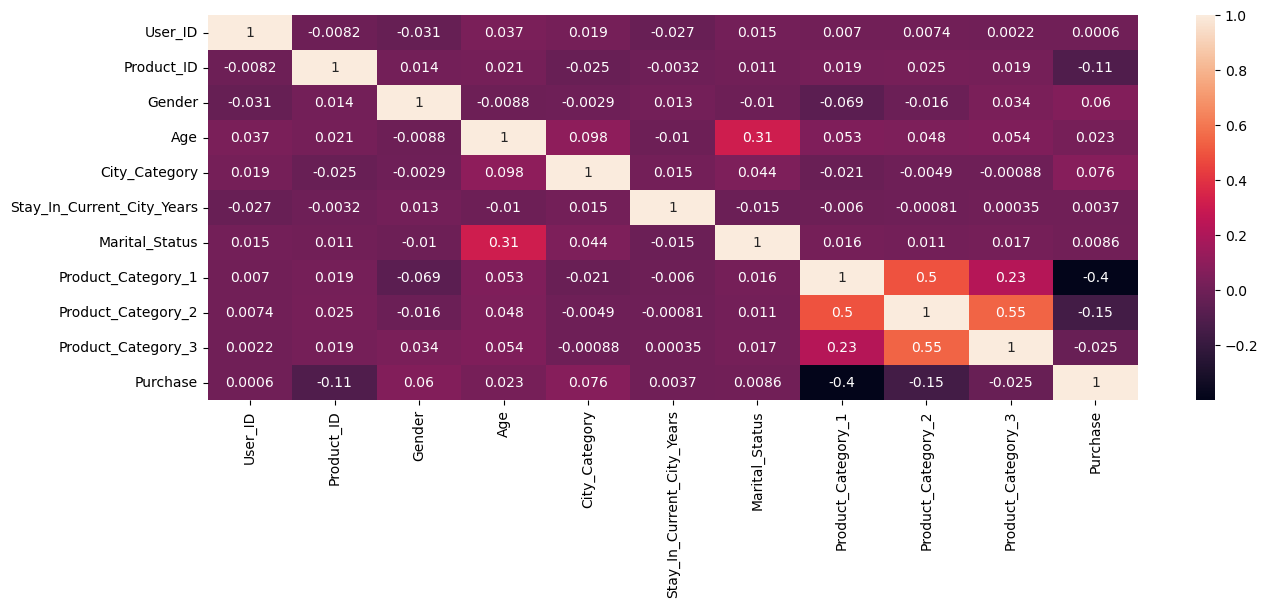

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Statistical Analysis

# Questions

In [37]:
#NUll hypothesis  - The mean is 10000
#Alternate hypothesis - The mean is not 10000

In [38]:
#One sample T-test

from scipy.stats import ttest_1samp
# t_stat, p_value = ttest_1samp(sample['Purchase'], p_mean)

In [39]:
new_data = data.loc[(data["Age"]==1) & data['Gender']==1] #Male code is 1 and 18-25 age group code is 1
new_data

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,20,487,1,1,0,4,0.0,1.0,8.0,17.0,12099.0
103,20,402,1,1,0,4,0.0,1.0,11.0,16.0,12098.0
111,20,358,1,1,0,4,0.0,2.0,4.0,15.0,9564.0
127,23,332,1,1,2,4,0.0,1.0,5.0,9.0,15361.0
128,23,71,1,1,2,4,0.0,1.0,2.0,15.0,15770.0
...,...,...,...,...,...,...,...,...,...,...,...
262758,4206,180,1,1,1,1,1.0,1.0,2.0,15.0,11512.0
262759,4206,394,1,1,1,1,1.0,1.0,15.0,18.0,11521.0
262760,4206,23,1,1,1,1,1.0,1.0,2.0,13.0,3988.0
262764,4206,75,1,1,1,1,1.0,5.0,8.0,17.0,5444.0


In [40]:
sample_size = 1000
sample = new_data.sample(sample_size, random_state=44)
sample

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
84865,1049,88,1,1,0,0,1.0,2.0,8.0,18.0,13004.0
106204,4116,22,1,1,1,0,0.0,1.0,2.0,5.0,15487.0
77936,5665,145,1,1,0,4,0.0,1.0,2.0,8.0,15826.0
229316,5055,249,1,1,2,0,0.0,6.0,8.0,13.0,12598.0
195613,179,138,1,1,2,0,0.0,1.0,2.0,15.0,15708.0
...,...,...,...,...,...,...,...,...,...,...,...
237161,559,186,1,1,0,1,0.0,1.0,5.0,18.0,19541.0
100783,3410,4,1,1,1,4,0.0,5.0,8.0,14.0,5150.0
106348,4141,83,1,1,1,4,0.0,1.0,6.0,14.0,15221.0
160789,830,178,1,1,0,1,0.0,1.0,2.0,15.0,19201.0


In [41]:
# Given in question, 
p_mean = 10000

In [42]:
sample_mean = sample["Purchase"].mean()
print(sample_mean)

11928.503


In [43]:
t_stat, p_value = ttest_1samp(sample['Purchase'], p_mean)
print(t_stat, p_value)

12.097964910571587 1.538786131447332e-31


In [44]:
#p value is less than 0.05 , reject the null hypothesis.
#Therefore, the mean purchase for men ages 18-25 is not 10000.

In [45]:
#NUll hypothesis  - proportion is 35%
#Alternate hypothesis - proportion is not 35%

In [46]:
#Ztest 

from statsmodels.stats.proportion import proportions_ztest

# z_stat, p_value = proportions_ztest(count=count,nobs=nobs, value=p0)

In [47]:
data_new = data.loc[(data['Purchase']>10000)]

In [48]:
data_new.shape

(49390, 11)

In [49]:
#no of women in the sample
count = data_new["Gender"].value_counts()[0]

#no. of obs
nobs = len(data_new["Gender"])

#hypothesise value
p0 = 0.35          # 35% given in question

In [50]:
z_stat, p_value = proportions_ztest(count=count,nobs=nobs, value=p0)
print(z_stat, p_value)

-79.12020590883206 0.0


In [51]:
#p-value is less than 0.05, reject the null hypothesis i.e.., proportion is not 35%

In [52]:
#null hypothesis - average spends are equal 
#alternate hypothesis - average spends are not equal

In [53]:
#f-test

from scipy.stats import f

# scipy.stats.f.cdf(F, df1, df2)

In [54]:
data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 1)]

In [55]:
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [56]:
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25403579.49849695
26680870.93292181


In [57]:
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

11885.35
10758.212


In [58]:
F = data_men_sample.Purchase.mean()/data_women_sample.Purchase.mean()
F

1.1047700119685318

In [59]:
df1 = len(data_men_sample) - 1
df2 = len(data_women_sample) - 1

print(df1, df2)

499 499


In [61]:
#p-value

#cdf - The cumulative distribution function is used 

import scipy
scipy.stats.f.cdf(F, df1, df2)

0.8669472154638921

In [63]:
#the p-value is greater than 0.05, do not reject the null hypothesis. 
#the null hypothesis is true. The average purchases are same. 

In [64]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

In [66]:
#Ztest 

from statsmodels.stats.proportion import proportions_ztest

# stat_2sample, p_value_2sample = proportions_ztest(count=count, nobs=nobs)

In [67]:
data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase'] > 10000)]

In [68]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [69]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [70]:
stat_2sample, p_value_2sample = proportions_ztest(count=count, 
                                                  nobs=nobs)
p_value_2sample

0.44778597581119517

In [71]:
#p value is more than 0.05, accept the null hypthesis. 
#therefore, Percentage of the men in the age groups is same